In [1]:
from Preprocessing.MECO_data_split import concat_MECO_langs
from Preprocessing.heatdata import get_gauss_data, get_scatter_data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import tensorflow as tf
from keras import layers
from keras.models import Sequential

In [10]:
data = concat_MECO_langs(['du'])
X, y, demo = get_gauss_data(data, wh=100)

In [12]:
X = X[:, :, :, tf.newaxis]
y = to_categorical(y, num_classes=np.unique(y))

In [14]:
np.nun

(563, 5)

In [4]:
X_train, X_test, y_train, y_test, demo_train, demo_test = train_test_split(X, y, demo, test_size=0.3)
X_val, X_test, y_val, y_test, demo_val, demo_test = train_test_split(X_test, y_test, demo_test, test_size=0.5)

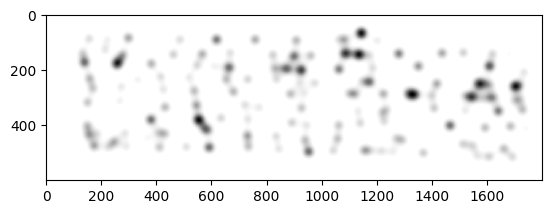

In [5]:
plt.imshow(X[0], interpolation='nearest', cmap='Greys')
plt.show()

In [6]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(600, 1800, 1)),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

In [ ]:
y_pred = model.predict(X_test)

In [63]:
X, y, demo = get_scatter_data(data)

In [64]:
X = X[:, :, :, tf.newaxis]
y = to_categorical(y)

In [65]:
X_train, X_test, y_train, y_test, demo_train, demo_test = train_test_split(X, y, demo, test_size=0.3)
X_val, X_test, y_val, y_test, demo_val, demo_test = train_test_split(X_test, y_test, demo_test, test_size=0.5)

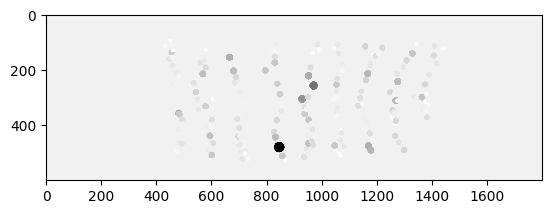

In [66]:
plt.imshow(X_test[0], interpolation='nearest', cmap='Greys')
plt.show()

In [77]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(600, 1800, 1)),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3, verbose=1)
callback = [early_stop]

In [79]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
13/13 [==============================] - 199s 15s/step - loss: 0.6959 - accuracy: 0.0076 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 192s 15s/step - loss: 12.1090 - accuracy: 0.0000e+00 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 180s 14s/step - loss: 16.1181 - accuracy: 0.0000e+00 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 4/10
 1/13 [=>............................] - ETA: 3:11 - loss: 16.1181 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)